## 1. Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
from sklearn.feature_selection import SelectPercentile , chi2
from pylab import *
import warnings
warnings.filterwarnings('ignore')

## 2. Reading Data

In [2]:
data=pd.read_csv('Brain Tumor.csv')
data.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

Below function creates the dataset with all the features for new images input by the user 

In [3]:
# def calculate_features(image):
#   features = []
#   mean = np.mean(image)
#   features.append(mean)
#   variance = np.var(image)
#   features.append(variance)
#   standard_deviation = np.std(image)
#   features.append(standard_deviation)
#   entropy = cv2.calcHist([image], [0], None, [256], [0, 255])
#   entropy = -np.sum(entropy * np.log2(entropy))
#   features.append(entropy)
#   skewness = cv2.mean(image**3) / (variance**1.5)
#   features.append(skewness)
#   kurtosis = cv2.mean((image - mean)**4) / (variance**2)
#   features.append(kurtosis)
#   contrast = np.std(image**2)
#   features.append(contrast)
#   energy = np.sum(image**2)
#   features.append(energy)
#   asm = cv2.mean(image**2)
#   features.append(asm)
#   homogeneity = np.sum(image / (np.max(image) - np.min(image) + 1))
#   features.append(homogeneity)
#   dissimilarity = np.sum((image - mean)**2)
#   features.append(dissimilarity)
#   correlation = np.sum(image * image**2)
#   features.append(correlation)
#   coarseness = np.sum(image**4)
#   features.append(coarseness)

#   return features

# def main():
#   image_list = os.listdir("./images")
#   features_dataset = pd.DataFrame(columns=["mean", "variance", "standard_deviation", "entropy", "skewness", "kurtosis", "contrast", "energy", "asm", "homogeneity", "dissimilarity", "correlation", "coarseness",
#   ])
#   for image_name in image_list:
#     image = cv2.imread(f"./images/{image_name}")
#     features = calculate_features(image)
#     features_dataset.loc[image_name] = features
#   features_dataset.to_csv("features_dataset.csv")

# if __name__ == "__main__":
#   main()

## 3. Data Exploration

In [4]:
data.describe()

Class         Mean     Variance  Standard Deviation      Entropy  \
count  3762.000000  3762.000000  3762.000000         3762.000000  3762.000000   
mean      0.447368     9.488890   711.101063           25.182271     0.073603   
std       0.497288     5.728022   467.466896            8.773526     0.070269   
min       0.000000     0.078659     3.145628            1.773592     0.000882   
25%       0.000000     4.982395   363.225459           19.058475     0.006856   
50%       0.000000     8.477531   622.580417           24.951560     0.066628   
75%       1.000000    13.212723   966.954319           31.095889     0.113284   
max       1.000000    33.239975  2910.581879           53.949809     0.394539   

          Skewness     Kurtosis     Contrast       Energy          ASM  \
count  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000   
mean      4.102727    24.389071   127.961459     0.204705     0.058632   
std       2.560940    56.434747   109.499601     0.129352     0.058300   
min       1.886014     3.942402     3.194733     0.024731     0.000612   
25%       2.620203     7.252852    72.125208     0.069617     0.004847   
50%       3.422210    12.359088   106.737418     0.225496     0.050849   
75%       4.651737    22.640304   161.059006     0.298901     0.089342   
max      36.931294  1371.640060  3382.574163     0.589682     0.347725   

       Homogeneity  Dissimilarity  Correlation     Coarseness  
count  3762.000000    3762.000000  3762.000000   3.762000e+03  
mean      0.479252       4.698498     0.955767  7.458341e-155  
std       0.127929       1.850173     0.026157   0.000000e+00  
min       0.105490       0.681121     0.549426  7.458341e-155  
25%       0.364973       3.412363     0.947138  7.458341e-155  
50%       0.512551       4.482404     0.961610  7.458341e-155  
75%       0.575557       5.723821     0.971355  7.458341e-155  
max       0.810921      27.827751     0.989972  7.458341e-155

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

### Observation
>#### All dataset is  numeric
>#### No Missing values in dataset

In [6]:
data.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [7]:
data.tail()

Image  Class       Mean     Variance  Standard Deviation   Entropy  \
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
3757  2.082079   4.647310  158.437600  0.220666  0.048693     0.487131   
3758  2.144625   4.882034  161.158675  0.225931  0.051045     0.502712   
3759  2.308349   5.579498  167.130118  0.228930  0.052409     0.492269   
3760  2.732822   7.757570  223.812932  0.261527  0.068397     0.480064   
3761  4.110669  17.538826  239.251388  0.306224  0.093773     0.494333   

      Dissimilarity  Correlation     Coarseness  
3757       5.211739     0.950972  7.458341e-155  
3758       5.083126     0.952749  7.458341e-155  
3759       5.103700     0.952181  7.458341e-155  
3760       6.439784     0.940898  7.458341e-155  
3761       6.787329     0.938731  7.458341e-155

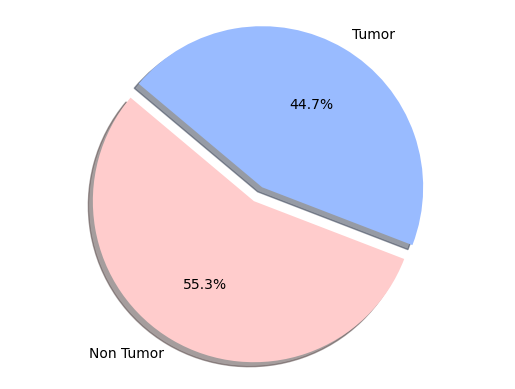

In [8]:
labels =["Non Tumor","Tumor"]
sizes = data['Class'].value_counts(sort = False)
colors = ["#ffcccc","#99bbff"]
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
Tumor = data[data.Class == 1]
Tumor.head()

Image  Class       Mean     Variance  Standard Deviation   Entropy  \
2    Image3      1   7.341095  1143.808219           33.820234  0.001467   
3    Image4      1   5.958145   959.711985           30.979219  0.001477   
9   Image10      1   8.476196  1095.785127           33.102645  0.003002   
10  Image11      1   9.804611  1114.829653           33.389065  0.002436   
11  Image12      1  12.326782  1150.677144           33.921632  0.003769   

    Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
2   5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3   5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
9   4.365000  19.682514   72.588783  0.045685  0.002087     0.361432   
10  3.872728  15.552862   66.285462  0.041140  0.001692     0.375618   
11  3.623978  14.762270  165.484791  0.051321  0.002634     0.385292   

    Dissimilarity  Correlation     Coarseness  
2        5.981800     0.978014  7.458341e-155  
3        7.700919     0.964189  7.458341e-155  
9        4.590795     0.967830  7.458341e-155  
10       4.626763     0.968750  7.458341e-155  
11       5.215436     0.958601  7.458341e-155

In [10]:
Non_Tumor = data[data.Class == 0]
Non_Tumor.head()

Image  Class       Mean    Variance  Standard Deviation   Entropy  \
0  Image1      0   6.535339  619.587845           24.891522  0.109059   
1  Image2      0   8.749969  805.957634           28.389393  0.266538   
4  Image5      0   7.315231  729.540579           27.010009  0.146761   
5  Image6      0   7.524109  607.395258           24.645390  0.214086   
6  Image7      0  12.304413  922.746138           30.376737  0.128833   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   
5  3.729886  14.471736  105.077882  0.421587  0.177736     0.598169   
6  2.930095   8.969348  115.203118  0.320675  0.102832     0.532292   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
4       6.834689     0.972789  7.458341e-155  
5       4.193146     0.976485  7.458341e-155  
6       4.880320     0.974745  7.458341e-155

## 4. Remove Identifier Feature

In [11]:
data = data.drop(data[['Image']],axis=1)
data.head()

Class      Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      0  6.535339   619.587845           24.891522  0.109059  4.276477   
1      0  8.749969   805.957634           28.389393  0.266538  3.718116   
2      1  7.341095  1143.808219           33.820234  0.001467  5.061750   
3      1  5.958145   959.711985           30.979219  0.001477  5.677977   
4      0  7.315231   729.540579           27.010009  0.146761  4.283221   

    Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0  18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1  14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2  26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3  33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4  19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   

   Correlation     Coarseness  
0     0.981939  7.458341e-155  
1     0.988834  7.458341e-155  
2     0.978014  7.458341e-155  
3     0.964189  7.458341e-155  
4     0.972789  7.458341e-155

## 5. Rename columns
Rename 'Standard Deviation' column to 'StandardDeviation'

In [12]:
data.columns=['Class','Mean', 'Variance', 'StandardDeviation', 'Entropy','Skewness', 
              'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity','Dissimilarity', 'Correlation', 'Coarseness']

## 6. Copy Dataset

In [13]:
dataCopied=data.copy()

## 7. Class Distribution

In [14]:
X = dataCopied.drop(["Class"], axis = 1)
y = data[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,shuffle = True, random_state = 8)

y_train["Class"].value_counts()

0    1559
1    1262
Name: Class, dtype: int64

## 8. Data Preprocessing on Training Dataset

### 8.1 Copy Training dataset

In [15]:
X_train_Clean=X_train.copy()

### 8.2 Outliers

In [16]:
Q1 = X_train_Clean.quantile(0.25)
Q3 = X_train_Clean.quantile(0.75)
IQR = Q3 - Q1

print('\nIdentifing outliers with IQR\n')
print(IQR)

print('\n\nIdentifing outliers with skewness\n')
print(X_train_Clean.skew()) 


Identifing outliers with IQR

Mean                   8.463226
Variance             601.744819
StandardDeviation     11.973318
Entropy                0.105463
Skewness               2.075322
Kurtosis              15.640092
Contrast              89.663258
Energy                 0.225957
ASM                    0.083808
Homogeneity            0.206558
Dissimilarity          2.295542
Correlation            0.023450
Coarseness             0.000000
dtype: float64


Identifing outliers with skewness

Mean                  0.734735
Variance              1.044936
StandardDeviation     0.174305
Entropy               0.965433
Skewness              4.348963
Kurtosis             11.579986
Contrast             10.991484
Energy                0.185026
ASM                   1.114823
Homogeneity          -0.294471
Dissimilarity         2.188281
Correlation          -5.233826
Coarseness            0.000000
dtype: float64


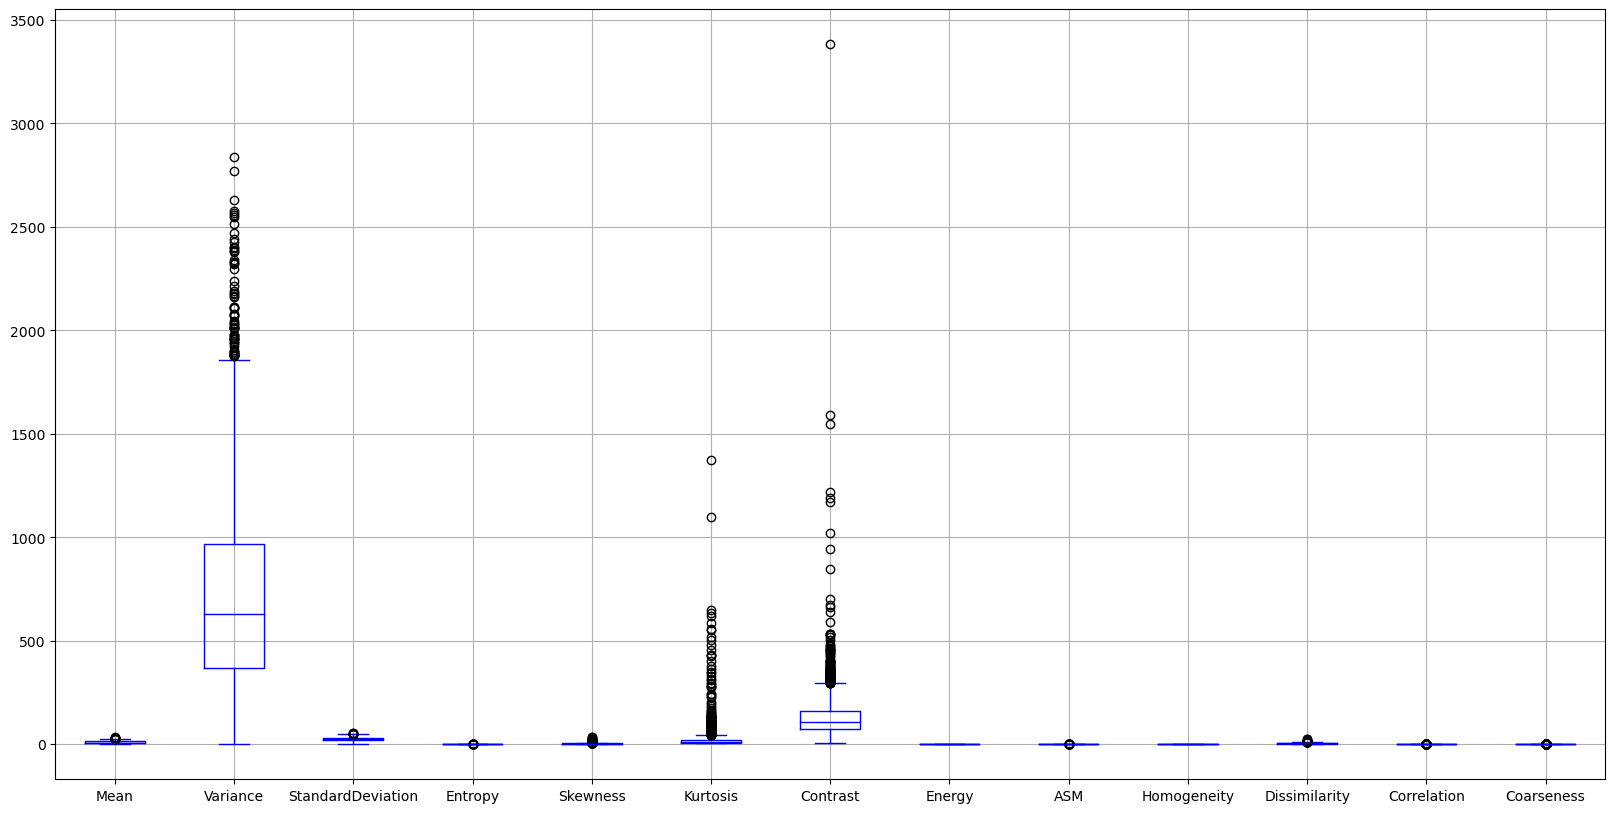

In [17]:
num_cols =X_train_Clean.columns

X_train_Clean[num_cols].boxplot(figsize =(20,10),color='blue')
plt.show()

###  Solutions: Quantile-based Flooring and Capping

In [18]:
def Outlier_Tratement (*features):
    for feature in features:
        minimum=X_train_Clean[feature].quantile(0.10)
        maximum=X_train_Clean[feature].quantile(0.90)

        Q1=X_train_Clean[feature].quantile(0.25)
        Q3=X_train_Clean[feature].quantile(0.75)
        IQR = Q3-Q1

        Min = Q1 - 1.5 * IQR  
        Max = Q3 + 1.5 * IQR

        X_train_Clean[feature]= np.where(X_train_Clean[feature] < Min,minimum,X_train_Clean[feature])
        X_train_Clean[feature]= np.where(X_train_Clean[feature] > Max,maximum,X_train_Clean[feature])
        
for s in X_train_Clean.columns:
    Outlier_Tratement(s)

In [19]:
print(X_train_Clean.skew()) 

Mean                 0.547997
Variance             0.590240
StandardDeviation    0.107950
Entropy              0.767304
Skewness             0.820839
Kurtosis             1.110304
Contrast             0.572341
Energy               0.185026
ASM                  0.817847
Homogeneity         -0.294471
Dissimilarity        0.311483
Correlation         -0.636041
Coarseness           0.000000
dtype: float64


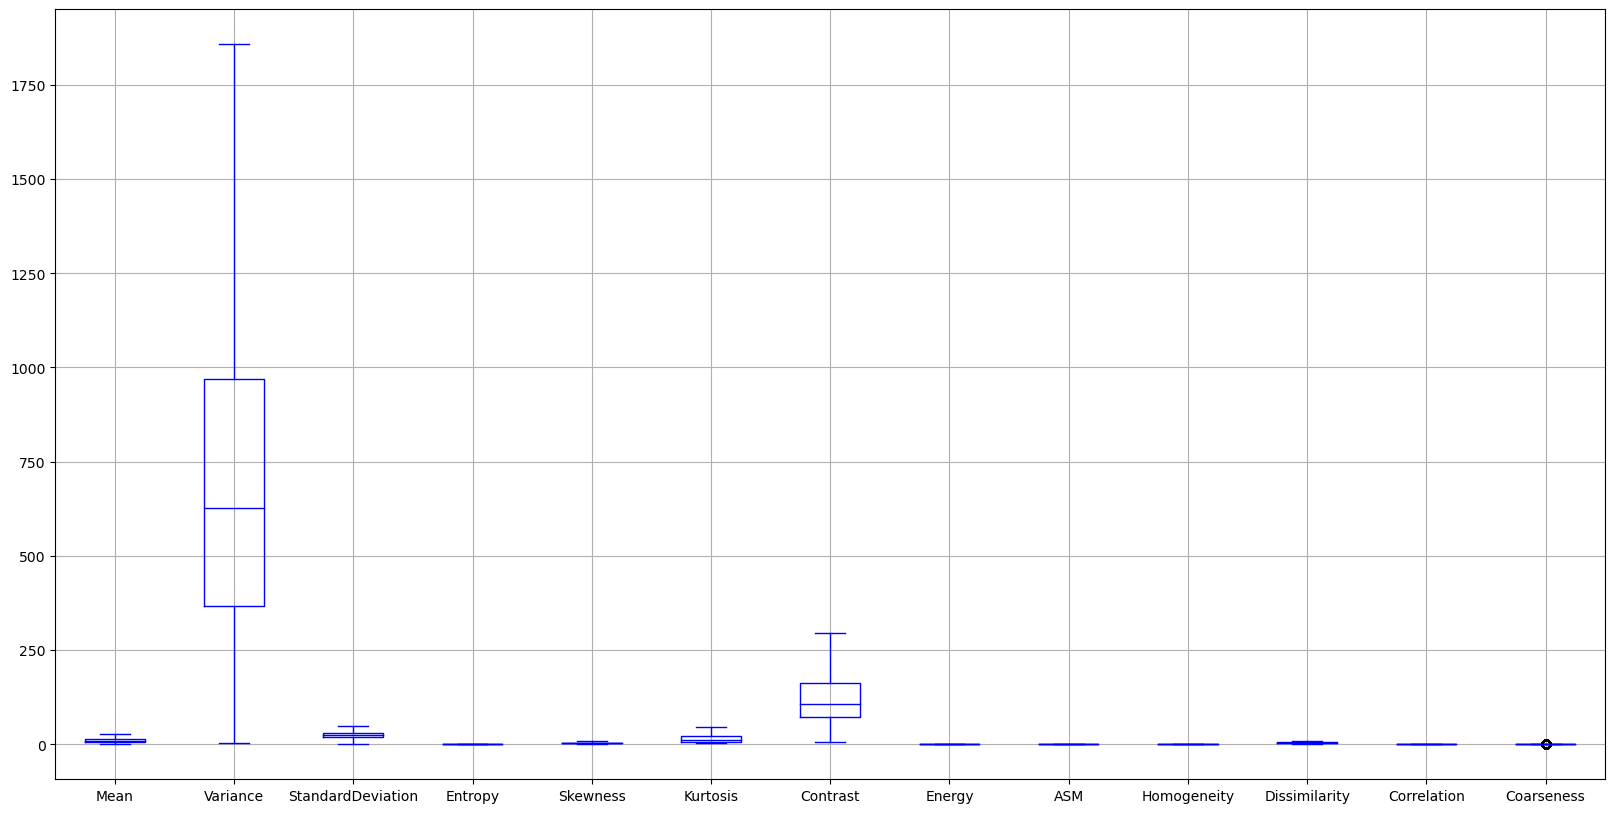

In [20]:
num_cols =X_train_Clean.columns

X_train_Clean[num_cols].boxplot(figsize =(20,10),color='blue')
plt.show()

### Other methods have been tried

#### Log Transformation

In [21]:
def logTransformation(*features):
    for feature in features:
        X_train_Clean[feature]= X_train_Clean[feature].map( lambda i: np.log(i) if i > 0 else 0 )
        
# for s in X_train_Clean.columns:
#    logTransformation(s)

#### Replace with Median

In [22]:
def Median (*features):
    for feature in features:
        median=X_train_Clean[feature].quantile(0.50)
        
        Q1=X_train_Clean[feature].quantile(0.25)
        Q3=X_train_Clean[feature].quantile(0.75)
        IQR = Q3-Q1

        Min = Q1 - 1.5 * IQR  
        Max = Q3 + 1.5 * IQR
        
        X_train_Clean[feature]= np.where(X_train_Clean[feature] < Min,median,X_train_Clean[feature])
        X_train_Clean[feature]= np.where(X_train_Clean[feature] > Max,median,X_train_Clean[feature])
        
# for s in X_train_Clean.columns:
#    Median(s)

### 8.3 Data Scaling

In [23]:
X_train_Clean.var()

Mean                     30.824971
Variance             174075.643298
StandardDeviation        74.176585
Entropy                   0.004391
Skewness                  2.075043
Kurtosis                158.147970
Contrast               3887.294487
Energy                    0.016428
ASM                       0.002860
Homogeneity               0.016037
Dissimilarity             2.438414
Correlation               0.000265
Coarseness                0.000000
dtype: float64

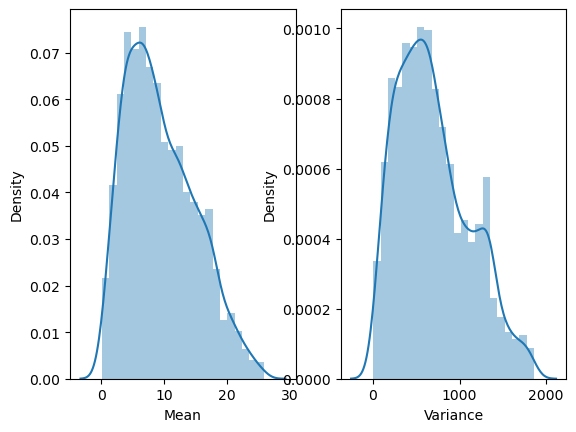

In [24]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax= sns.distplot(X_train_Clean['Variance'])

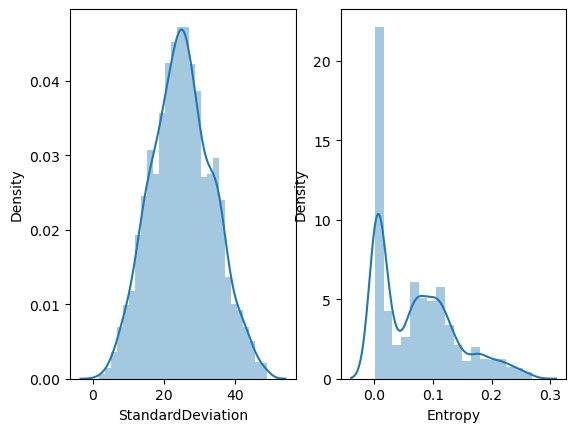

In [25]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

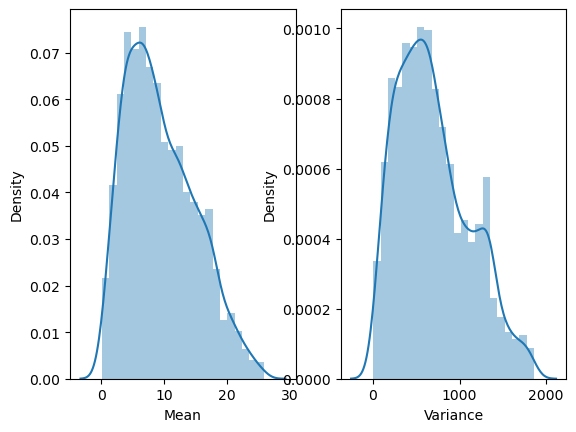

In [26]:
subplot(1,2,1)
ax= sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Variance'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

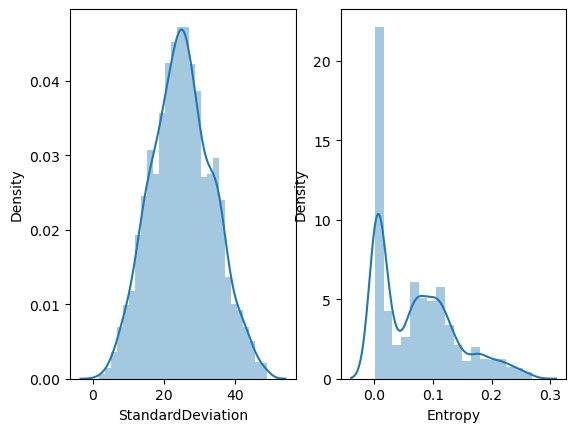

In [27]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

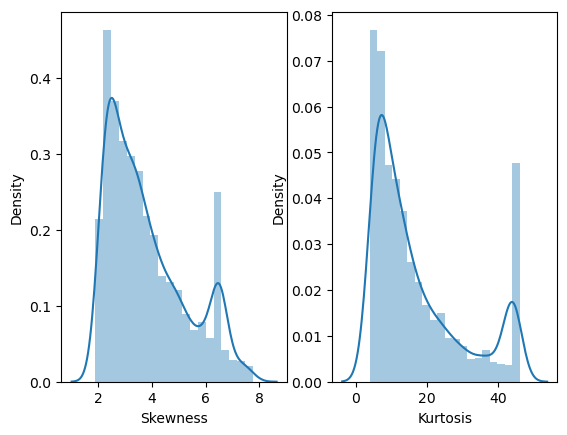

In [28]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Skewness'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Kurtosis'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

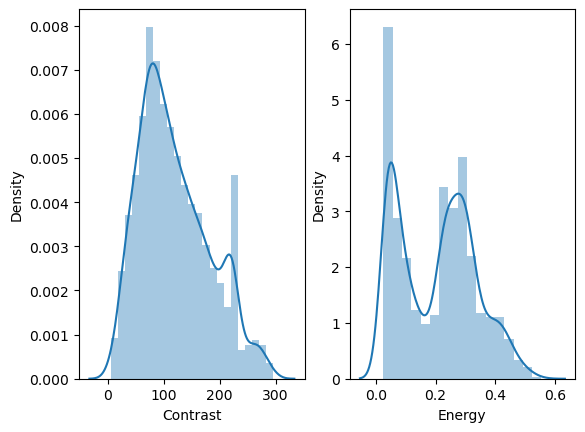

In [29]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Contrast'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Energy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

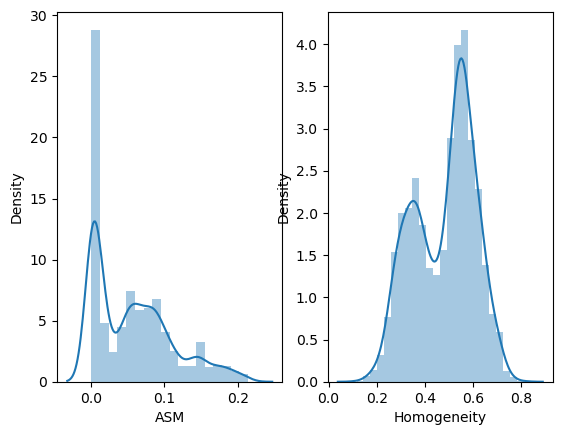

In [30]:
subplot(1,2,1)                    
ax=sns.distplot(X_train_Clean['ASM'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Homogeneity'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

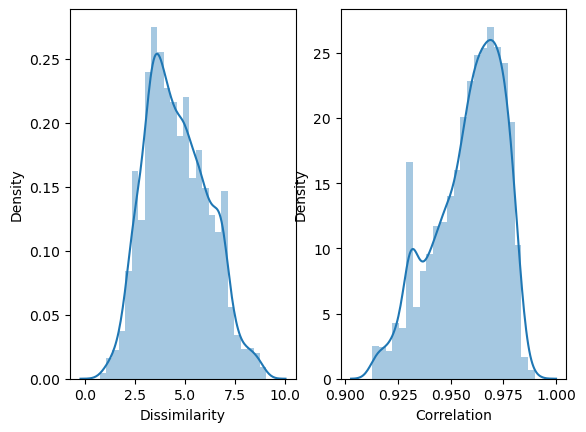

In [31]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Dissimilarity'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Correlation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

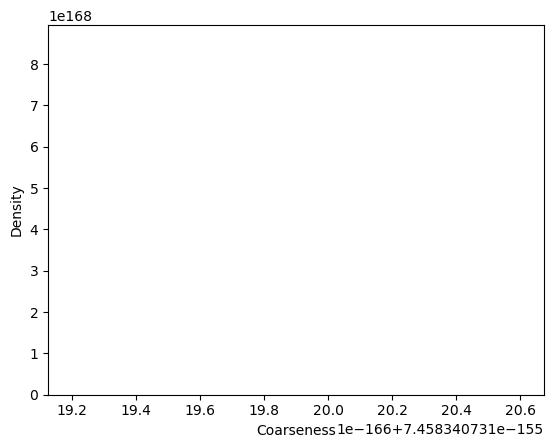

In [32]:
ax=sns.distplot(X_train_Clean['Coarseness'])
plt.show

### Solution: Normalization

In [33]:
cols = X_train_Clean.columns
scaler = preprocessing.MinMaxScaler()

dataScaler = scaler.fit_transform(X_train_Clean)
dataScaler = pd.DataFrame(dataScaler , columns =cols)

X_train_Clean=dataScaler.copy()
X_train_Clean.head()

Mean  Variance  StandardDeviation   Entropy  Skewness  Kurtosis  \
0  0.228230  0.263828           0.432081  0.526496  0.372780  0.308959   
1  0.211161  0.184338           0.355551  0.309562  0.320679  0.253434   
2  0.767072  0.583300           0.659520  0.275598  0.030446  0.014712   
3  0.273887  0.335129           0.491389  0.420700  0.321226  0.247641   
4  0.483291  0.389759           0.532671  0.395364  0.135077  0.087236   

   Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  \
0  0.790197  0.589501  0.531310     0.652387       0.583817     0.396657   
1  0.561996  0.433657  0.301830     0.622590       0.495548     0.164221   
2  0.356272  0.404942  0.266528     0.591146       0.389320     0.663584   
3  0.585266  0.516761  0.416237     0.763207       0.304827     0.609730   
4  0.243825  0.500385  0.392254     0.594519       0.409496     0.808901   

   Coarseness  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

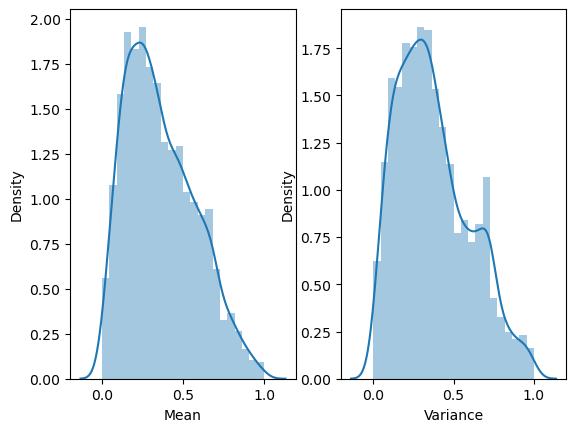

In [34]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax= sns.distplot(X_train_Clean['Variance'])

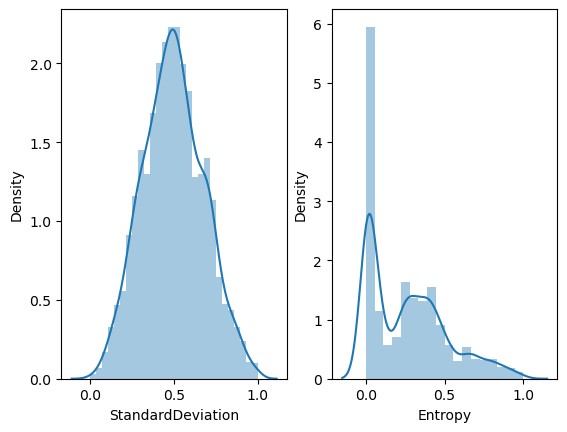

In [35]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

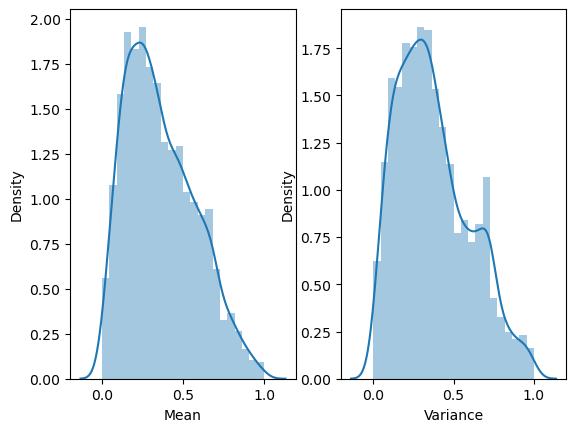

In [36]:
subplot(1,2,1)
ax= sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Variance'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

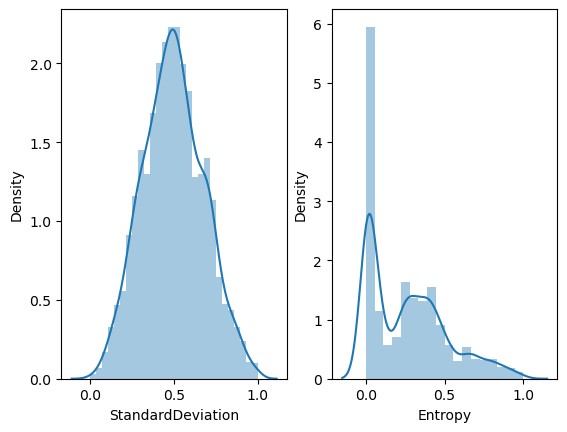

In [37]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

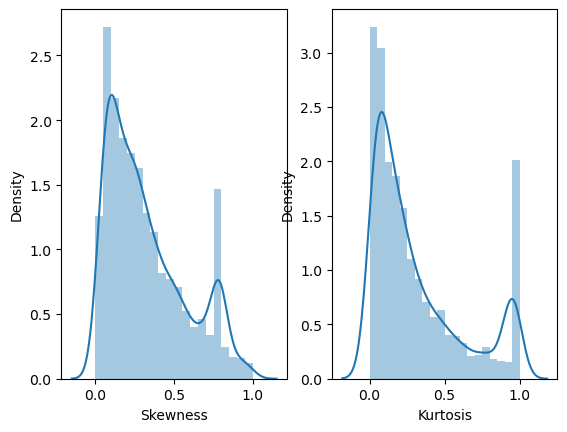

In [38]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Skewness'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Kurtosis'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

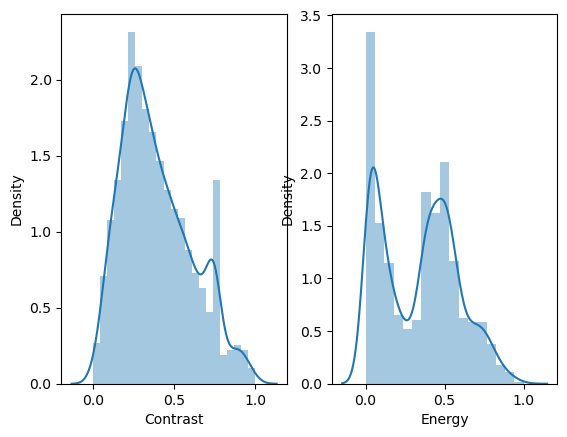

In [39]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Contrast'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Energy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

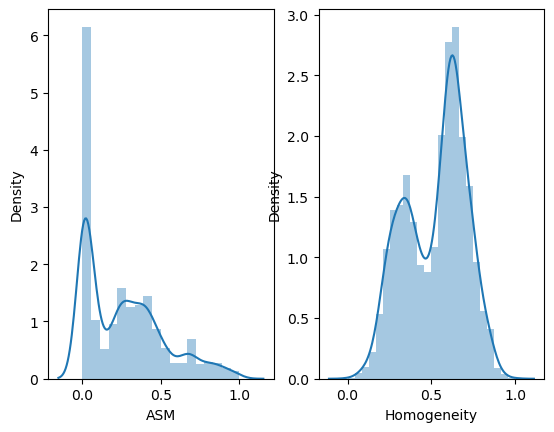

In [40]:
subplot(1,2,1)                    
ax=sns.distplot(X_train_Clean['ASM'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Homogeneity'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

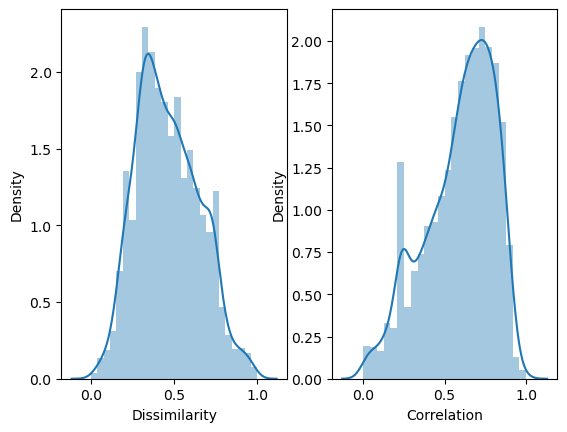

In [41]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Dissimilarity'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Correlation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

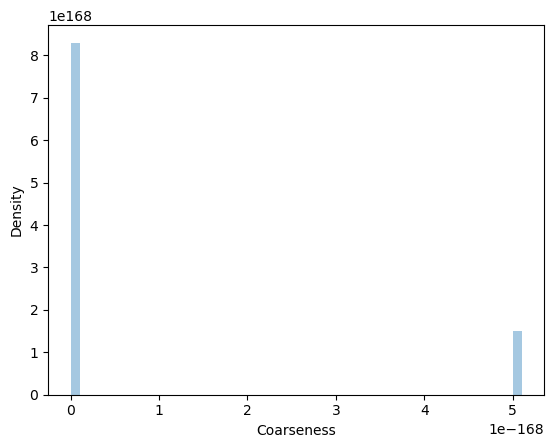

In [42]:
ax=sns.distplot(X_train_Clean['Coarseness'])
plt.show

### Other methods have been tried
#### Standardization 

In [43]:
cols = X_train_Clean.columns
scaler = preprocessing.StandardScaler()

dataScaler = scaler.fit_transform(X_train_Clean)
dataScaler = pd.DataFrame(dataScaler , columns =cols)

X_train_Clean=dataScaler.copy()
X_train_Clean.describe()

Mean      Variance  StandardDeviation       Entropy  \
count  2.821000e+03  2.821000e+03       2.821000e+03  2.821000e+03   
mean  -1.007505e-17 -2.937506e-16       3.315320e-16 -6.926595e-17   
std    1.000177e+00  1.000177e+00       1.000177e+00  1.000177e+00   
min   -1.695725e+00 -1.657971e+00      -2.721663e+00 -1.074106e+00   
25%   -8.152736e-01 -7.871389e-01      -7.046833e-01 -9.750606e-01   
50%   -1.654644e-01 -1.603058e-01      -1.766630e-02 -8.349944e-02   
75%    7.093464e-01  6.553761e-01       6.857753e-01  6.166875e-01   
max    2.970842e+00  2.787976e+00       2.765935e+00  2.976022e+00   

           Skewness      Kurtosis      Contrast        Energy           ASM  \
count  2.821000e+03  2.821000e+03  2.821000e+03  2.821000e+03  2.821000e+03   
mean  -8.689729e-17 -4.785648e-17  1.763133e-17 -2.644700e-17 -9.823171e-17   
std    1.000177e+00  1.000177e+00  1.000177e+00  1.000177e+00  1.000177e+00   
min   -1.322175e+00 -1.036416e+00 -1.826965e+00 -1.405008e+00 -1.049529e+00   
25%   -8.327765e-01 -7.861851e-01 -7.549022e-01 -1.035481e+00 -9.631024e-01   
50%   -2.655575e-01 -3.811255e-01 -1.877521e-01  1.583704e-01 -1.106573e-01   
75%    6.081737e-01  4.577121e-01  6.834585e-01  7.277482e-01  6.042274e-01   
max    2.756031e+00  2.320405e+00  2.829710e+00  2.732523e+00  2.942015e+00   

        Homogeneity  Dissimilarity   Correlation     Coarseness  
count  2.821000e+03   2.821000e+03  2.821000e+03   2.821000e+03  
mean   2.570711e-16   1.331795e-16  2.392824e-16  1.054500e-184  
std    1.000177e+00   1.000177e+00  1.000177e+00   0.000000e+00  
min   -2.879614e+00  -2.470444e+00 -2.803344e+00 -7.829211e-169  
25%   -8.839575e-01  -7.615245e-01 -6.560812e-01 -7.829211e-169  
50%    2.561640e-01  -1.142362e-01  1.936799e-01 -7.829211e-169  
75%    7.474417e-01   7.087839e-01  7.838023e-01 -7.829211e-169  
max    2.612772e+00   2.872571e+00  1.937850e+00  4.317819e-168

### 8.4  Feature Selection
### Correlation

In [44]:
X_train_Clean['Class']=y_train['Class']
corr_matrix = X_train_Clean.corr()
corr_matrix

Mean  Variance  StandardDeviation   Entropy  Skewness  \
Mean               1.000000  0.766947           0.779143 -0.071068 -0.776992   
Variance           0.766947  1.000000           0.974251 -0.338492 -0.364042   
StandardDeviation  0.779143  0.974251           1.000000 -0.330553 -0.390221   
Entropy           -0.071068 -0.338492          -0.330553  1.000000 -0.297167   
Skewness          -0.776992 -0.364042          -0.390221 -0.297167  1.000000   
Kurtosis          -0.738730 -0.367432          -0.394899 -0.324197  0.988297   
Contrast           0.043028  0.336861           0.328542 -0.210698  0.286349   
Energy             0.004491 -0.324934          -0.314459  0.971194 -0.388739   
ASM               -0.075730 -0.335643          -0.327663  0.994600 -0.288186   
Homogeneity        0.113867 -0.288137          -0.280575  0.856514 -0.555493   
Dissimilarity     -0.079459  0.332180           0.327119 -0.550909  0.521501   
Correlation        0.282954  0.318924           0.351123  0.151564 -0.285240   
Coarseness              NaN       NaN                NaN       NaN       NaN   
Class              0.002178  0.006784          -0.000015  0.013379 -0.009067   

                   Kurtosis  Contrast    Energy       ASM  Homogeneity  \
Mean              -0.738730  0.043028  0.004491 -0.075730     0.113867   
Variance          -0.367432  0.336861 -0.324934 -0.335643    -0.288137   
StandardDeviation -0.394899  0.328542 -0.314459 -0.327663    -0.280575   
Entropy           -0.324197 -0.210698  0.971194  0.994600     0.856514   
Skewness           0.988297  0.286349 -0.388739 -0.288186    -0.555493   
Kurtosis           1.000000  0.282627 -0.408286 -0.315928    -0.574721   
Contrast           0.282627  1.000000 -0.207234 -0.205785    -0.363616   
Energy            -0.408286 -0.207234  1.000000  0.964808     0.913806   
ASM               -0.315928 -0.205785  0.964808  1.000000     0.847232   
Homogeneity       -0.574721 -0.363616  0.913806  0.847232     1.000000   
Dissimilarity      0.527569  0.769105 -0.597289 -0.541625    -0.792049   
Correlation       -0.302848 -0.426308  0.139937  0.151194     0.169307   
Coarseness              NaN       NaN       NaN       NaN          NaN   
Class             -0.011060 -0.014334  0.013535  0.012542     0.020412   

                   Dissimilarity  Correlation  Coarseness     Class  
Mean                   -0.079459     0.282954         NaN  0.002178  
Variance                0.332180     0.318924         NaN  0.006784  
StandardDeviation       0.327119     0.351123         NaN -0.000015  
Entropy                -0.550909     0.151564         NaN  0.013379  
Skewness                0.521501    -0.285240         NaN -0.009067  
Kurtosis                0.527569    -0.302848         NaN -0.011060  
Contrast                0.769105    -0.426308         NaN -0.014334  
Energy                 -0.597289     0.139937         NaN  0.013535  
ASM                    -0.541625     0.151194         NaN  0.012542  
Homogeneity            -0.792049     0.169307         NaN  0.020412  
Dissimilarity           1.000000    -0.322831         NaN -0.028006  
Correlation            -0.322831     1.000000         NaN  0.000340  
Coarseness                   NaN          NaN         NaN       NaN  
Class                  -0.028006     0.000340         NaN  1.000000

In [45]:
corr_matrix['Class'].sort_values(ascending= False)

Class                1.000000
Homogeneity          0.020412
Energy               0.013535
Entropy              0.013379
ASM                  0.012542
Variance             0.006784
Mean                 0.002178
Correlation          0.000340
StandardDeviation   -0.000015
Skewness            -0.009067
Kurtosis            -0.011060
Contrast            -0.014334
Dissimilarity       -0.028006
Coarseness                NaN
Name: Class, dtype: float64

### Observation:
#### [ Homogeneity, Energy, Entropy, ASM, Variance, Mean, Correlation ] : Positive Correlation
#### [ StandardDeviation, Skewness, Kurtosis, Coarseness,  Contrast, Dissimilarity ] : Negative Correlation

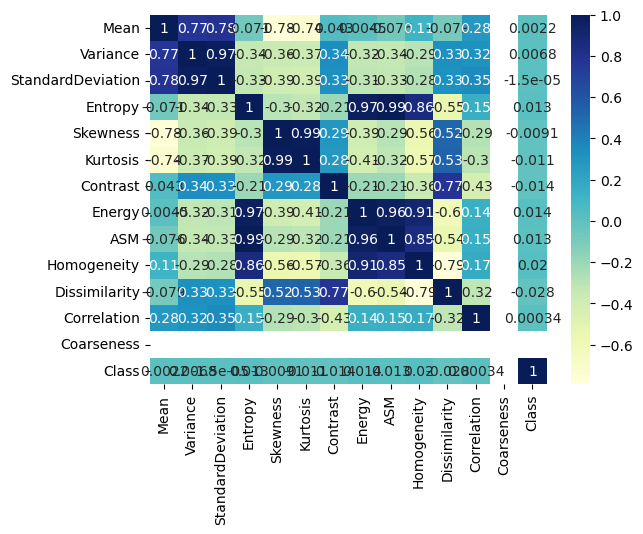

In [46]:
sns.heatmap(X_train_Clean.corr(),cmap='YlGnBu',annot=True)
plt.rcParams["figure.figsize"]=(20,20)
plt.show()

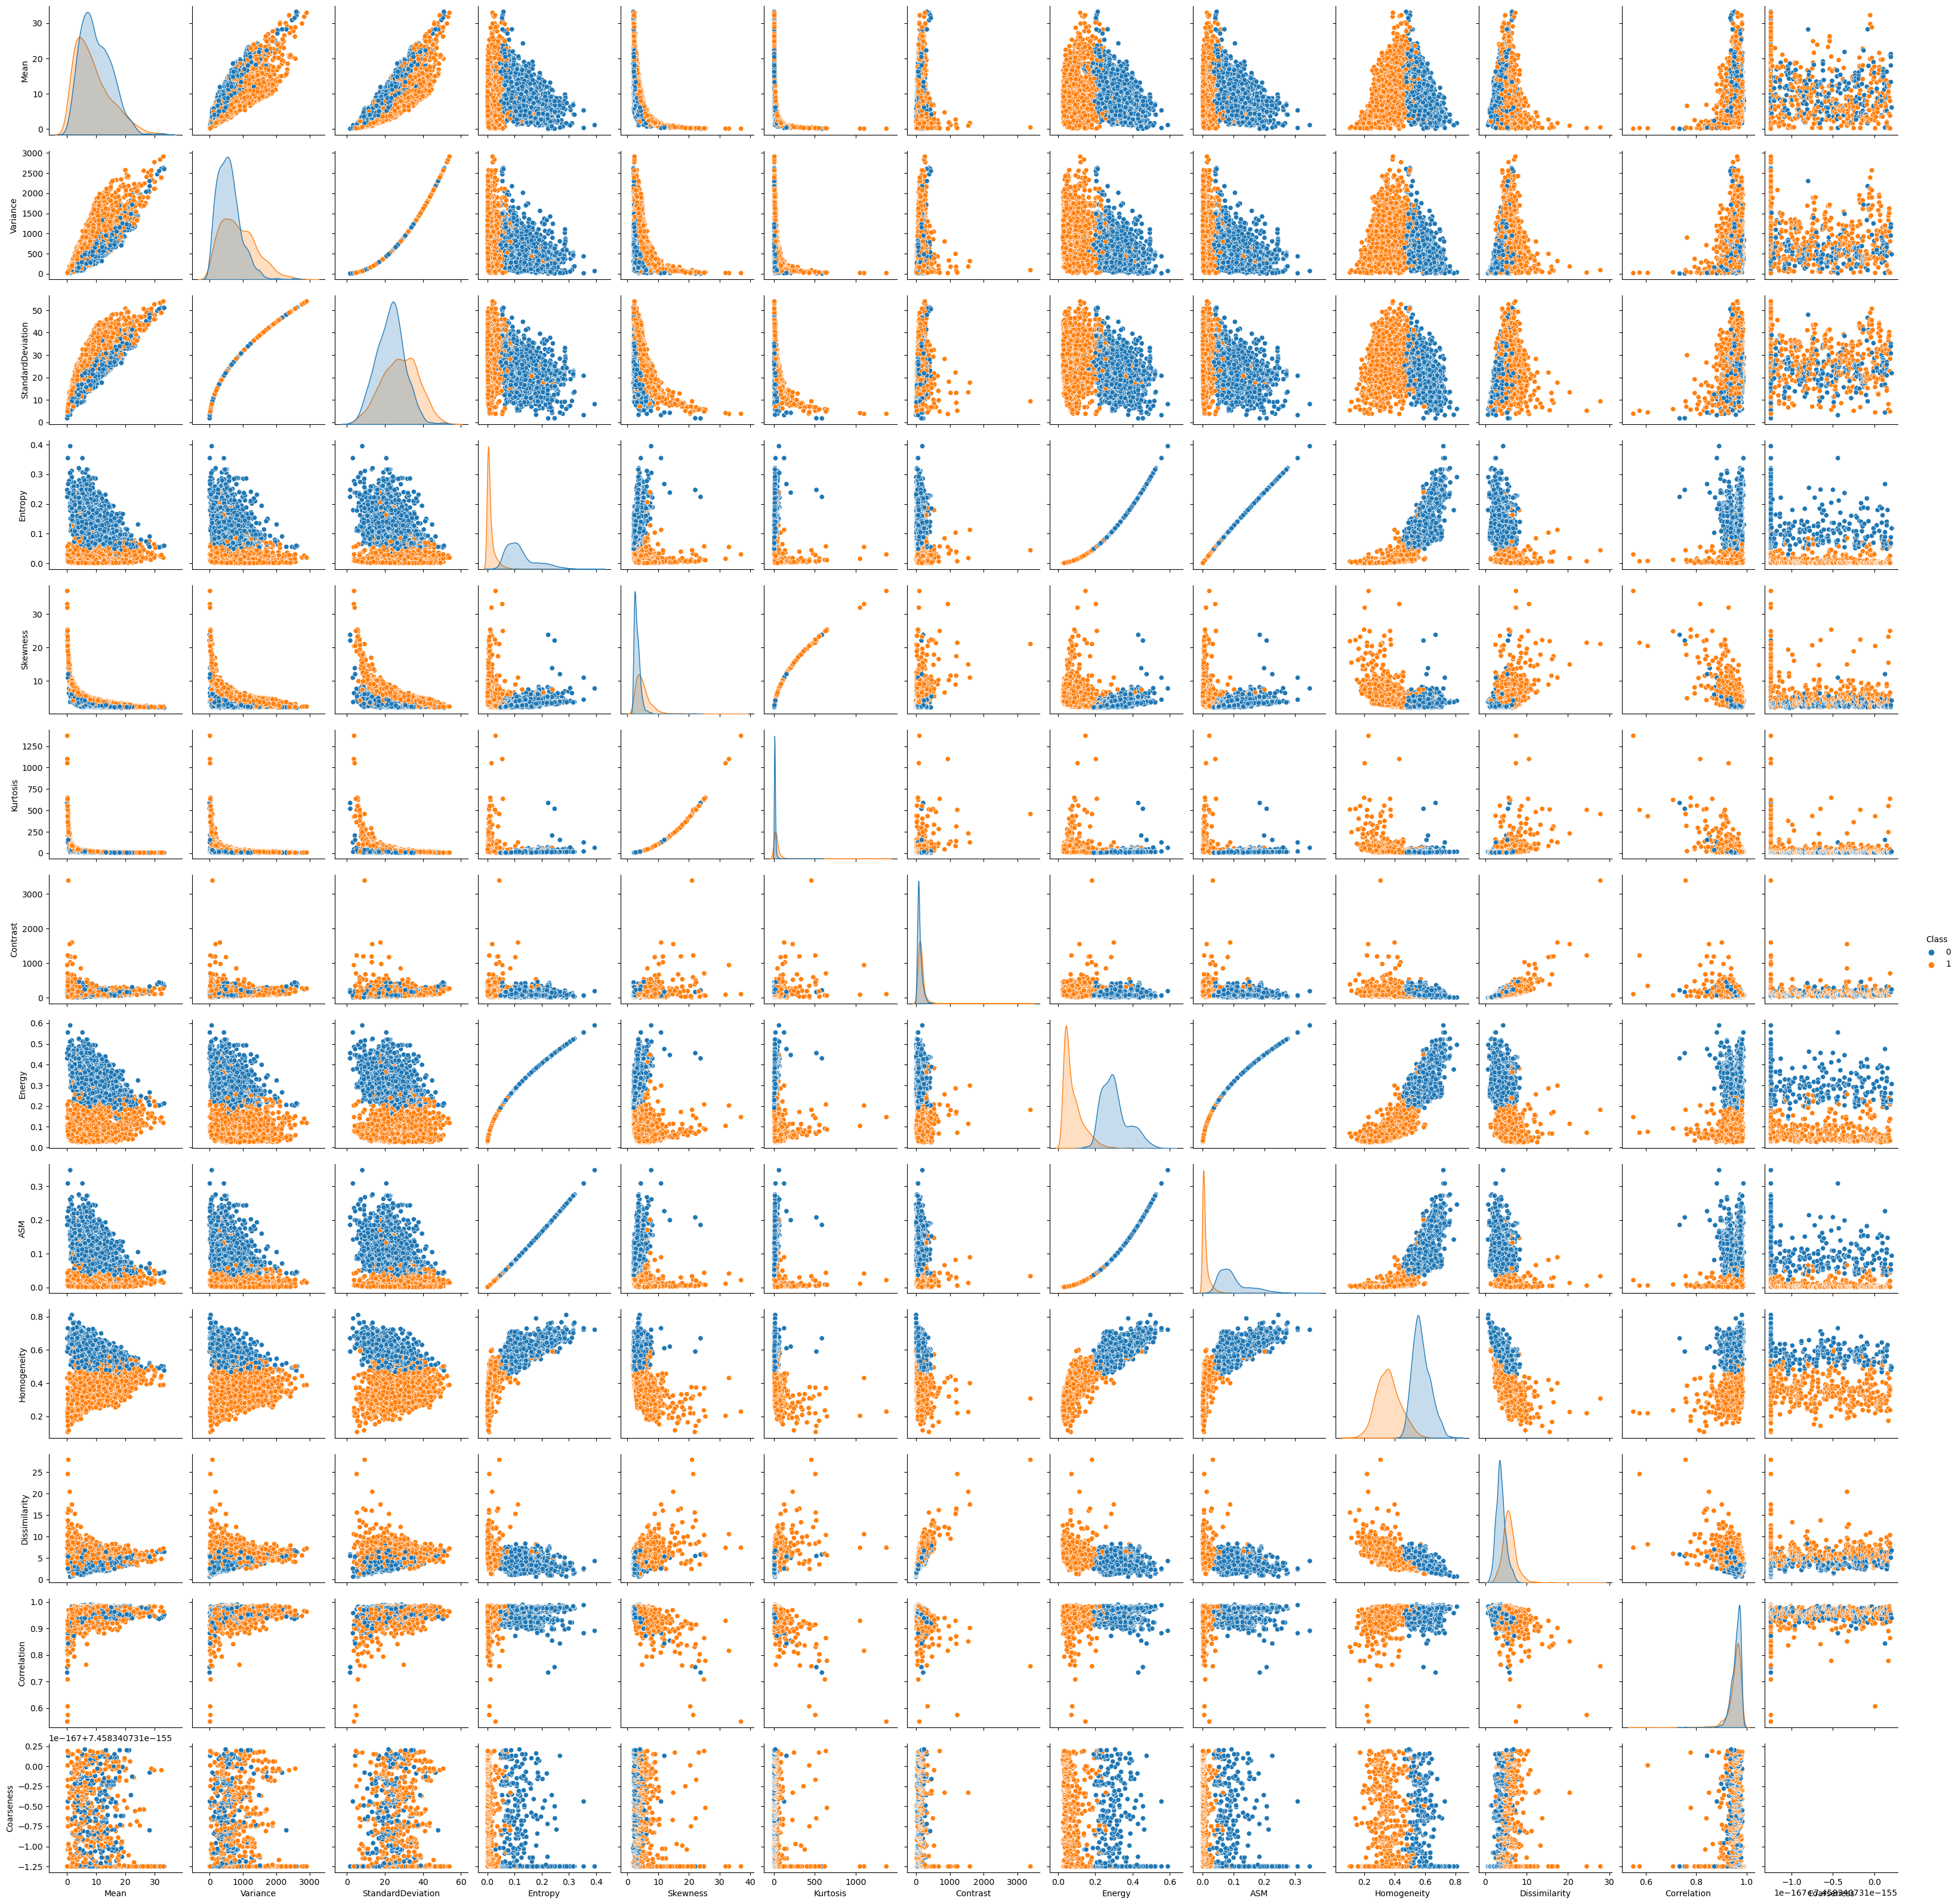

In [47]:
sns.pairplot(dataCopied, hue = 'Class')

## Solution

In [48]:
X_train_Clean= X_train_Clean.drop('Class', axis=1)

In [49]:
X_train_Clean = X_train_Clean.drop(columns=['Correlation'])

## 9. Data Preprocessing on Test Dataset

### 9.1 Copy Test dataset

In [50]:
X_test_Clean= X_test.copy()

### 9.2 Outliers

In [51]:
def Outlier_Tratement (*features):
    for feature in features:
        minimum=X_test_Clean[feature].quantile(0.10)
        maximum=X_test_Clean[feature].quantile(0.90)

        Q1=X_test_Clean[feature].quantile(0.25)
        Q3=X_test_Clean[feature].quantile(0.75)
        IQR = Q3-Q1

        Min = Q1 - 1.5 * IQR  
        Max = Q3 + 1.5 * IQR

        X_test_Clean[feature]= np.where(X_test_Clean[feature] < Min,minimum,X_test_Clean[feature])
        X_test_Clean[feature]= np.where(X_test_Clean[feature] > Max,maximum,X_test_Clean[feature])
        
for s in X_test_Clean.columns:
    Outlier_Tratement(s)

In [52]:
print(X_test_Clean.skew()) 

Mean                 0.547022
Variance             0.622482
StandardDeviation    0.108429
Entropy              0.780704
Skewness             0.786603
Kurtosis             1.143635
Contrast             0.557046
Energy               0.189743
ASM                  0.831180
Homogeneity         -0.265775
Dissimilarity        0.297278
Correlation         -0.780107
Coarseness           0.000000
dtype: float64


### 9.3 Normalization

In [53]:
cols = X_test_Clean.columns
scaler = preprocessing.MinMaxScaler()

dataScaler = scaler.fit_transform(X_test_Clean)
dataScaler = pd.DataFrame(dataScaler , columns =cols)

X_test_Clean=dataScaler.copy()
X_test_Clean.head()

Mean  Variance  StandardDeviation   Entropy  Skewness  Kurtosis  \
0  0.244077  0.164605           0.338350  0.363900  0.267857  0.193190   
1  0.159393  0.135193           0.303331  0.326603  0.462797  0.405169   
2  0.353530  0.581601           0.668048  0.003309  0.456270  0.406778   
3  0.273157  0.205005           0.381734  0.403156  0.283746  0.209788   
4  0.042926  0.034380           0.136678  0.645590  0.830496  0.996295   

   Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  \
0  0.284021  0.454081  0.360148     0.628084       0.395961     0.556519   
1  0.166970  0.426750  0.321392     0.714324       0.260835     0.881265   
2  0.750059  0.018789  0.002926     0.308053       0.908280     0.628775   
3  0.372241  0.483473  0.404269     0.641521       0.444309     0.573744   
4  0.646800  1.000000  0.670456     0.899998       0.429511     0.282804   

   Coarseness  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

### 9.4 Feature Selection

In [54]:
X_test_Clean = X_test_Clean.drop('Correlation' , axis=1)

# Models  

SUPPORT VECTOR CLASSIFICATION

In [55]:
model = SVC()
model.fit(X_train_Clean, y_train)

SVC()

In [56]:
model_fit= model.score(X_train_Clean,y_train)
model_acc= model.score(X_test_Clean,y_test)
print("Train Accuracy: ",model_fit)
print("Test Accuracy: ",model_acc)

Train Accuracy:  0.9879475363346331
Test Accuracy:  0.8873538788522848


In [57]:
predictions = model.predict(X_test_Clean)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       520
           1       1.00      0.75      0.86       421

    accuracy                           0.89       941
   macro avg       0.92      0.87      0.88       941
weighted avg       0.91      0.89      0.88       941



FINE TUNING

In [77]:
params = {
    'C': [0.1,1,10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [10,1]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
grid_search_cv = GridSearchCV(SVC(random_state=123), param_grid=params, verbose=1, cv=kfold)
search = grid_search_cv.fit(X_train_Clean, y_train)
final_model = search.best_estimator_
print(final_model)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
SVC(C=1, gamma=1, random_state=123)


In [72]:
# model = SVC(C=0.1, gamma=10, kernel='poly', random_state=123)
model = SVC(C=0.1, gamma=1, kernel='poly', random_state=123)
model.fit(X_train_Clean,y_train)

model_fit= model.score(X_train_Clean,y_train)
model_acc= model.score(X_test_Clean,y_test)
print("Train Accuracy: ",model_fit)
print("Test Accuracy: ",model_acc)

Train Accuracy:  0.9914923785891527
Test Accuracy:  0.8161530286928799


In [60]:
model_y_pred = model.predict(X_test_Clean)
model_precision_score = precision_score(y_test, model_y_pred)
model_recall_score = recall_score(y_test, model_y_pred)
fp1, tp1, th1 = roc_curve(y_test, model_y_pred)
model_auc = auc(fp1, tp1)

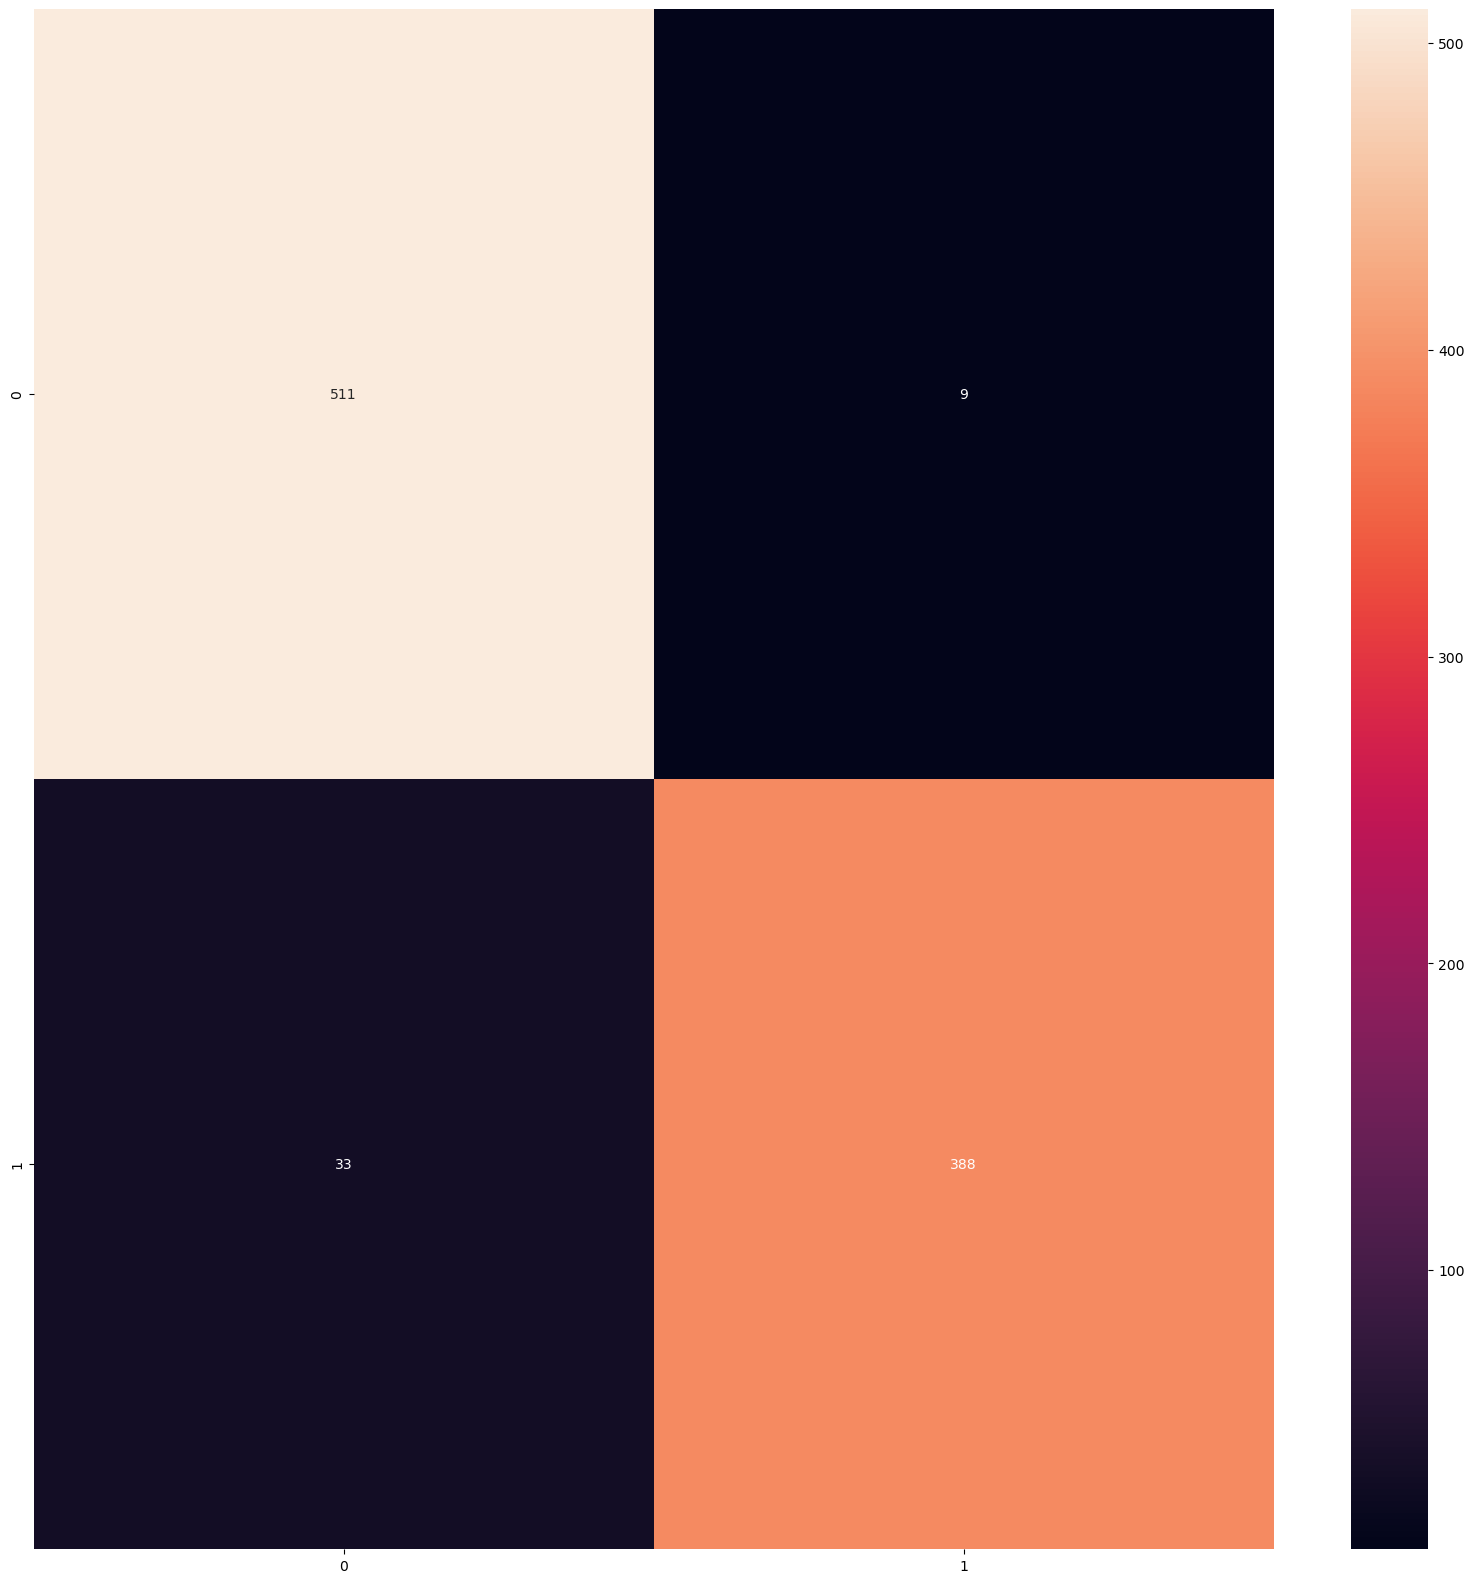

In [61]:
sns.heatmap(confusion_matrix(y_test.values.ravel(),model_y_pred),annot=True,fmt='d')

plt.rcParams["figure.figsize"]=(5,5)
plt.show()

In [62]:
predictions = model.predict(X_test_Clean)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       520
           1       0.98      0.92      0.95       421

    accuracy                           0.96       941
   macro avg       0.96      0.95      0.95       941
weighted avg       0.96      0.96      0.96       941

